### <b>Support Vector Machine - Classification/Classifier</b>

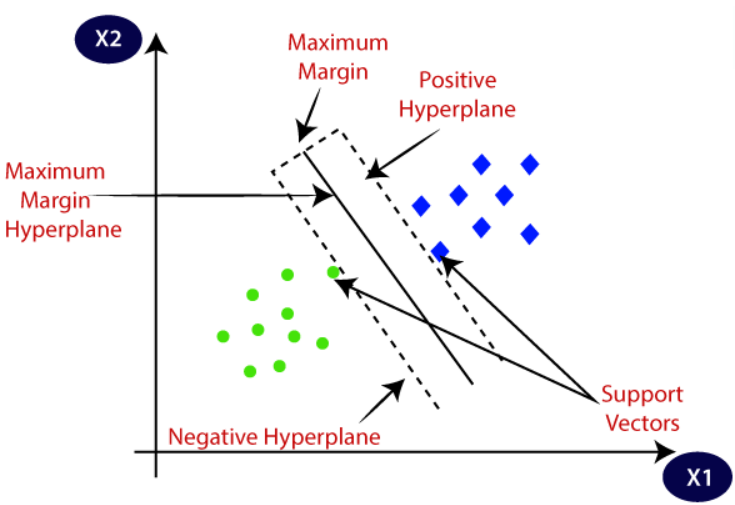
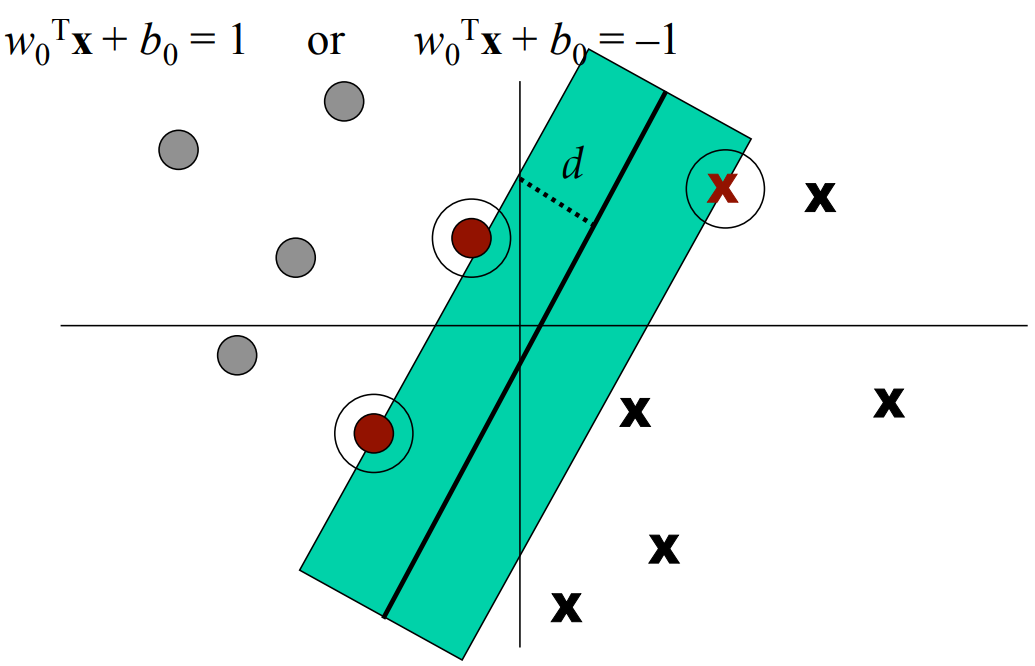
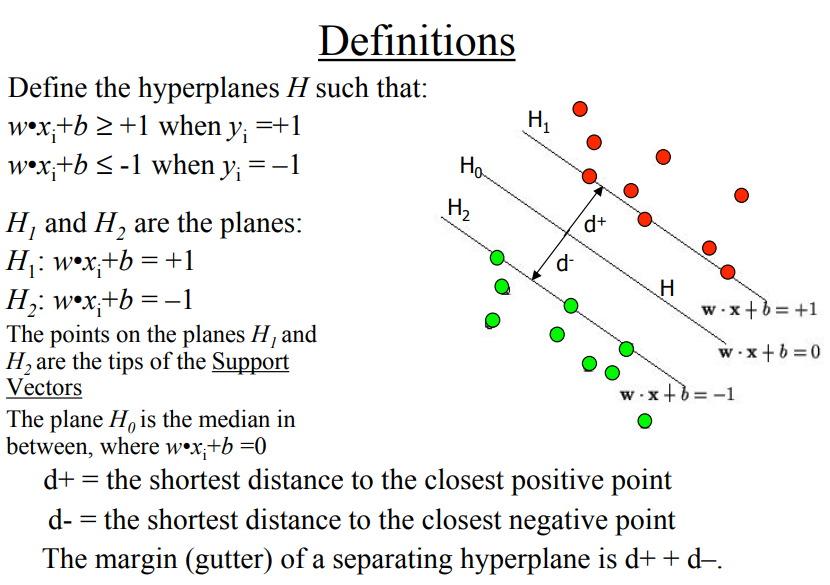
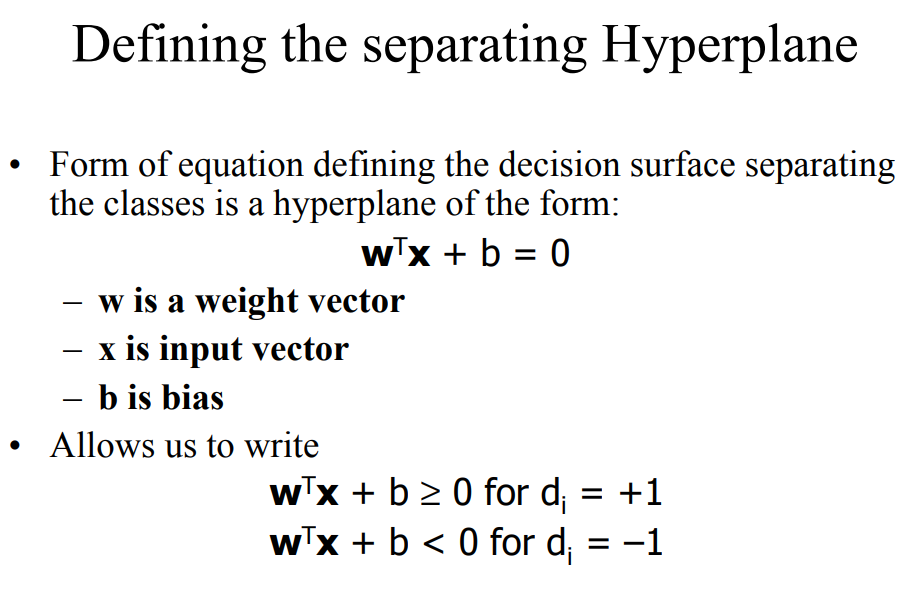
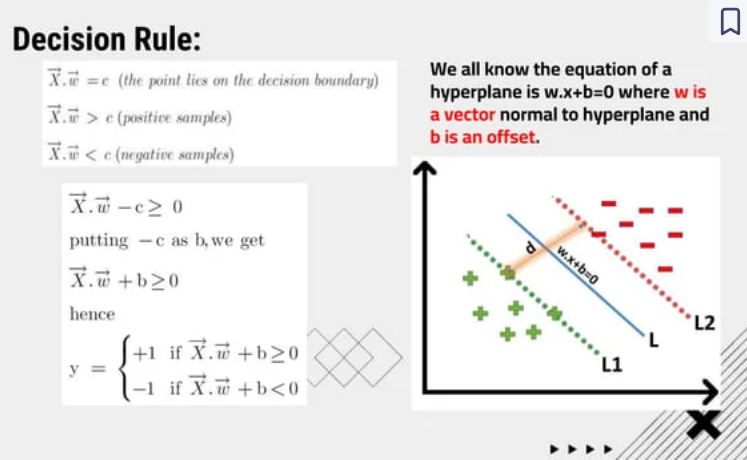
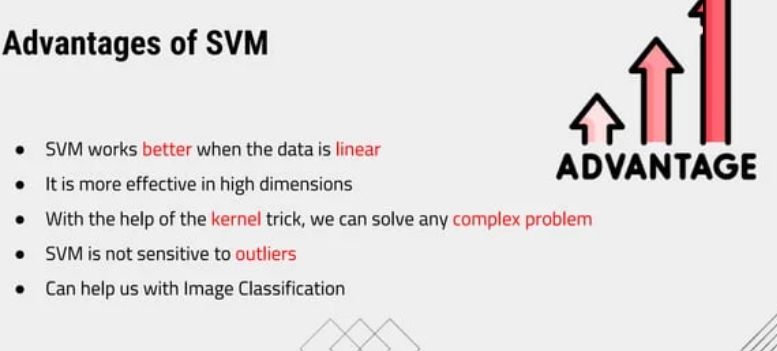
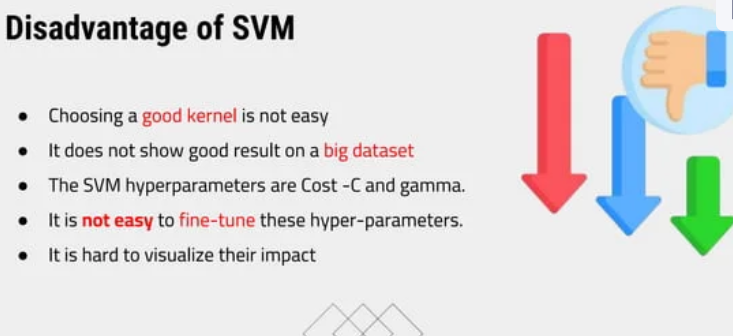

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [42]:
dataset = pd.read_csv("Social_Network_Ads.csv")

print(dataset)

description = dataset.describe()

print(f"Description: \n{description}\n")

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

print(f"X: \n{X}\n")
print(f"y: \n{y}\n")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

     Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]
Description: 
              Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.000000     15000.000000    0.000000
25%     29.750000     43000.000000    0.000000
50%     37.000000     70000.000000    0.000000
75%     46.000000     88000.000000    1.000000
max     60.000000    150000.000000    1.000000

X: 
[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [   

In [59]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.fit_transform(X_test)

print(f"X_train: \n{X_train}\n")
print(f"X_test: \n{X_test}\n")

X_train: 
[[ 0.73139197 -1.23815383]
 [ 1.11051523  0.52003242]
 [-1.16422436 -1.17954762]
 [-0.31119701 -1.47257866]
 [ 1.86876176  0.90097278]
 [ 1.01573442  0.52003242]
 [ 0.16270707  0.13909207]
 [ 0.9209536  -1.17954762]
 [ 0.9209536   0.57863863]
 [ 0.9209536  -1.09163831]
 [ 1.30007687  1.98518763]
 [ 0.3522687  -0.50557622]
 [ 1.4896385  -1.29676004]
 [-0.31119701 -1.38466935]
 [-0.31119701  0.05118276]
 [ 0.9209536  -0.85721347]
 [ 0.16270707  0.22700138]
 [-0.69032028  0.02187965]
 [-1.06944355 -1.56048797]
 [ 0.3522687  -0.00742345]
 [ 0.3522687   0.57863863]
 [ 1.11051523 -1.003729  ]
 [ 2.0583234   0.3735169 ]
 [ 1.20529605  1.86797521]
 [-0.50075865  2.30752178]
 [ 2.0583234  -0.82791037]
 [ 1.86876176 -0.94512279]
 [-0.02685456  1.25261003]
 [ 0.9209536   0.10978896]
 [-1.35378599  0.54933553]
 [ 0.25748788 -0.3297576 ]
 [-0.31119701  0.60794173]
 [ 0.3522687   0.08048586]
 [-0.59553946  1.36982244]
 [-0.59553946  1.89727832]
 [ 1.30007687  0.57863863]
 [ 0.82617278 -0.5

In [66]:

support_vector_classifier = SVC(kernel = 'linear', random_state = 0)
support_vector_classifier.fit(X_train, y_train)

sample_prediction = support_vector_classifier.predict(standard_scaler.fit_transform(
    [
        [27, 57000]
    ]
))

print(f"0. Sample prediction for (27, 57000): {sample_prediction}\n")

y_predicted = support_vector_classifier.predict(X_test)

print(f"1. y_predicted: \n{y_predicted}\n")

comparison = np.concatenate((y_predicted.reshape(len(y_predicted), 1), y_test.reshape(len(y_test), 1)), 1)

print(f"2. Comparison: \n{comparison}\n")

confusion_matrix_result = confusion_matrix(y_true = y_test, y_pred = y_predicted)

print(f"3. Confusion matrix: \n{confusion_matrix_result}\n")

accuracy_score_result = accuracy_score(y_true = y_test, y_pred = y_predicted)

print(f"4. Accuracy score result: \n{accuracy_score_result}")

classification_report_result = classification_report(y_true = y_test, y_pred = y_predicted)

print(f"\n5. Classifaction report: \n{classification_report_result}")

0. Sample prediction for (27, 57000): [0]

1. y_predicted: 
[0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1
 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0]

2. Comparison: 
[[0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]]

3. Confusion matr

C:\Users\PanCh\AppData\Local\Temp\ipykernel_26388\2618557262.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


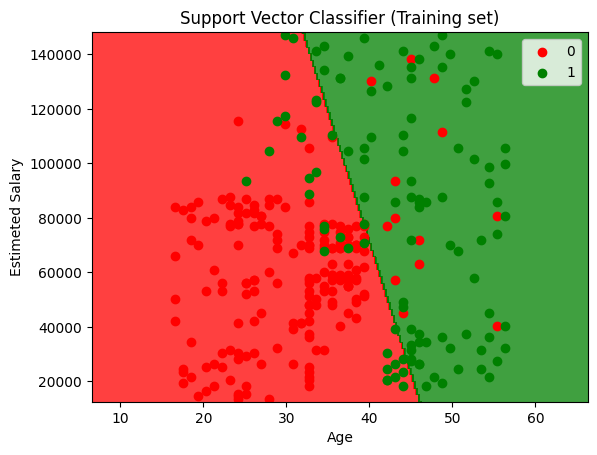

In [45]:
X_set, y_set = standard_scaler.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -10, stop = X_set[:, 0].max()+10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, support_vector_classifier.predict(standard_scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title("Support Vector Classifier (Training set)")
plt.xlabel('Age')
plt.ylabel('Estimeted Salary')
plt.legend()
plt.show()

C:\Users\PanCh\AppData\Local\Temp\ipykernel_26388\1393555056.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


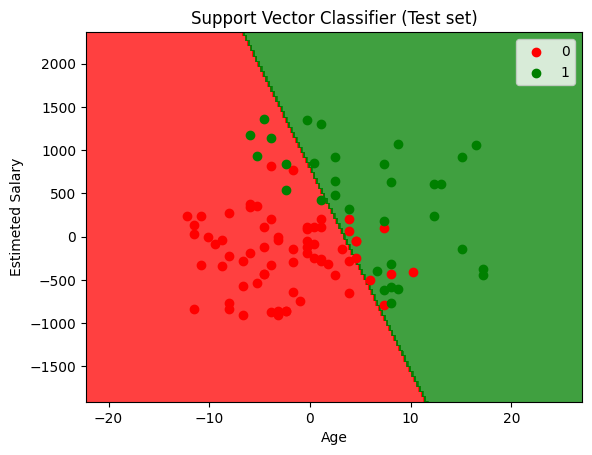

In [63]:
X_set, y_set = standard_scaler.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -10, stop = X_set[:, 0].max()+10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, support_vector_classifier.predict(standard_scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title("Support Vector Classifier (Test set)")
plt.xlabel('Age')
plt.ylabel('Estimeted Salary')
plt.legend()
plt.show()